# Importing Libraries

In [1]:
import os #Interacting with the operating system
import numpy as np #Dimensional arrays & computational tools
import matplotlib.pyplot as plt #Visualizations
import seaborn as sns #Statistical graphics
import pandas as pd #Data analysis and manipulation
import base64 #Encoding binary data
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

# Gathering Data

In [2]:
#Path of COvid 19 image dateset
train = "C:/Users/johne/CNN C19 IMG/train"
test = "C:/Users/johne/CNN C19 IMG/test"
validation = "C:/Users/johne/CNN C19 IMG/validation"

# Data Analysis Train Data

size of image (h x w) 3480 4248


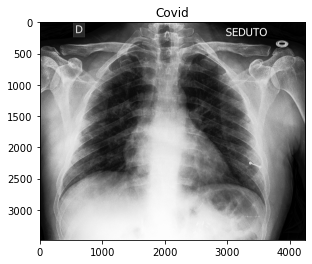

In [3]:
img = plt.imread(os.path.join(train, "Covid/01.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Covid')
print("size of image (h x w)",height,width)

size of image (h x w) 1708 1944


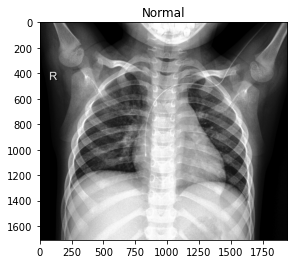

In [4]:
img = plt.imread(os.path.join(train, "Normal/01.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Normal')
print("size of image (h x w)",height,width)

size of image (h x w) 1333 1582


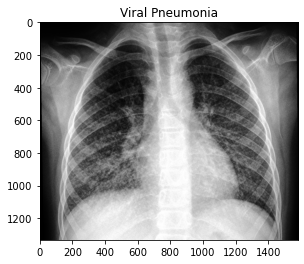

In [5]:
img = plt.imread(os.path.join(train, "Viral Pneumonia/01.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Viral Pneumonia')
print("size of image (h x w)",height,width)

# Data Analysis Test Data

size of image (h x w) 391 436


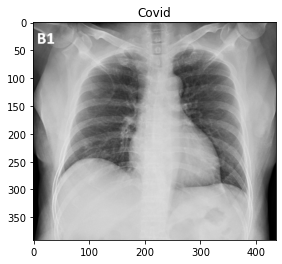

In [6]:
img = plt.imread(os.path.join(test, "Covid/094.png"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Covid')
print("size of image (h x w)",height,width)

size of image (h x w) 1585 1785


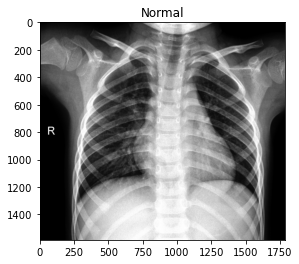

In [7]:
img = plt.imread(os.path.join(test, "Normal/0101.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Normal')
print("size of image (h x w)",height,width)

size of image (h x w) 968 1304


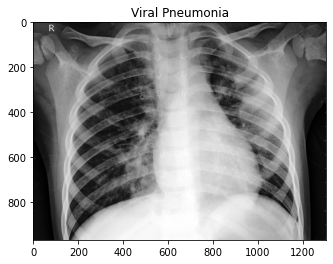

In [8]:
img = plt.imread(os.path.join(test, "Viral Pneumonia/0101.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Viral Pneumonia')
print("size of image (h x w)",height,width)

# Data Analysis Validation Data

size of image (h x w) 2296 2496


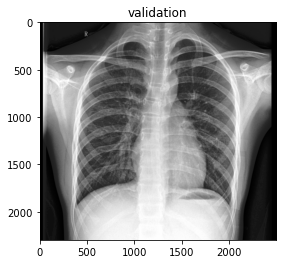

In [9]:
img = plt.imread(os.path.join(validation, "pic1.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('validation')
print("size of image (h x w)",height,width)

# Preparing Data

In [10]:
train_data = image_dataset_from_directory(directory=r"C:/Users/johne/CNN C19 IMG/train", #Set up train data image size
                                          batch_size=5,
                                          image_size=(256,256))

Found 249 files belonging to 3 classes.


In [11]:
test_data = image_dataset_from_directory(directory=r"C:/Users/johne/CNN C19 IMG/test", #Set up test image size
                                          batch_size=5,
                                          image_size=(256,256))

Found 65 files belonging to 3 classes.


In [12]:
class_names=train_data.class_names #Classifications in train data
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


In [13]:
class_names=test_data.class_names#Classifications in test data
print(class_names)

['Covid', 'Normal', 'Viral Pneumonia']


# Choosing Model

In [14]:
cnn_model = Sequential([ #CNN model
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(3)
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [15]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Training

In [16]:
history = cnn_model.fit(
  train_data,
  validation_data=test_data,
  epochs=5
)

Epoch 1/5
50/50 [==============================] - 14s 258ms/step - loss: 0.7327 - accuracy: 0.7189 - val_loss: 0.5241 - val_accuracy: 0.7692
Epoch 2/5
50/50 [==============================] - 13s 250ms/step - loss: 0.3033 - accuracy: 0.8715 - val_loss: 0.4189 - val_accuracy: 0.8308
Epoch 3/5
50/50 [==============================] - 12s 237ms/step - loss: 0.1641 - accuracy: 0.9076 - val_loss: 0.4340 - val_accuracy: 0.7846
Epoch 4/5
50/50 [==============================] - 12s 235ms/step - loss: 0.1055 - accuracy: 0.9558 - val_loss: 0.5856 - val_accuracy: 0.8000
Epoch 5/5
50/50 [==============================] - 12s 237ms/step - loss: 0.0896 - accuracy: 0.9719 - val_loss: 0.6373 - val_accuracy: 0.8000


# Evaluation

In [17]:
#Model Accuracy and Loss scores
modelLoss, modelAccuracy=cnn_model.evaluate(test_data, verbose=0)
print('Test Accuracy is: {:.2f}%'.format(modelAccuracy))
print('Test Loss is:     {:.2f}%'.format(modelLoss))

Test Accuracy is: 0.80%
Test Loss is:     0.64%


# Hyperparameter Tuning

In [18]:
#Using vgg16 for image processing
#Importing Validation image data
val_img1=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic1.jpeg', target_size=(256, 256))
val_img2=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic2.jpeg', target_size=(256, 256))
val_img3=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic3.jpeg', target_size=(256, 256))
val_img4=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic4.jpeg', target_size=(256, 256))
val_img5=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic5.jpeg', target_size=(256, 256))
val_img6=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic6.jpeg', target_size=(256, 256))
val_img7=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic7.jpg', target_size=(256, 256))
val_img8=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic8.jpeg', target_size=(256, 256))
val_img9=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic9.jpeg', target_size=(256, 256))
val_img10=image.load_img(r'C:\Users\johne\CNN C19 IMG\validation\pic10.jpeg', target_size=(256, 256))

def model_predict(img, actual):
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x_processed=preprocess_input(x)
    result=cnn_model.predict(x_processed)
    index = np.argmax(result,axis=1)
    
    if index==0:
       result="C"
    elif index==1:
       result="N"
    else:
       result="V"

    plt.figure()
    plt.imshow(img)
    plt.title('Diagnosis : {}'.format(result))

# Prediction

1/1 [==============================] - 0s 34ms/step


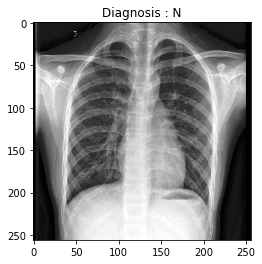

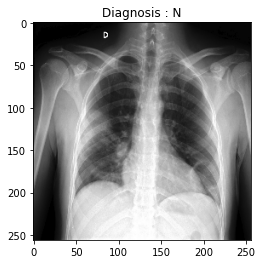

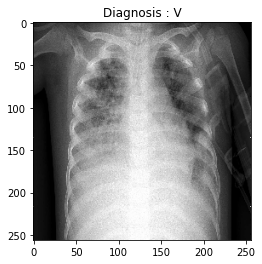

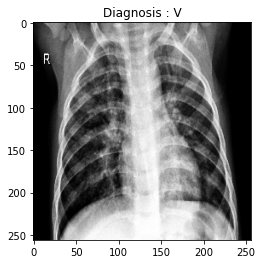

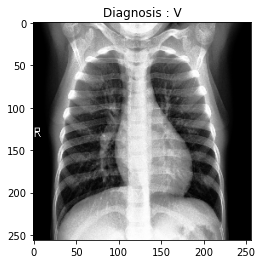

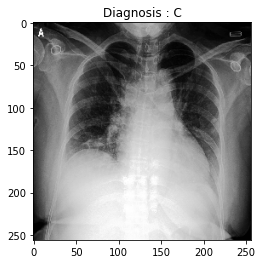

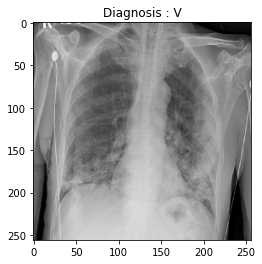

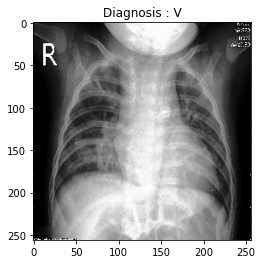

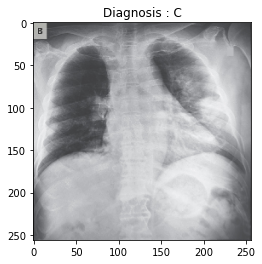

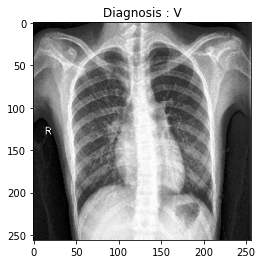

In [19]:
#Predicting Image CLassification
pred_img1=model_predict(val_img1,"Validation")
pred_img2=model_predict(val_img2, "Validation")
pred_img3=model_predict(val_img3, "Validation")
pred_img4=model_predict(val_img4, "Validation")
pred_img5=model_predict(val_img5, "Validation")
pred_img6=model_predict(val_img6, "Validation")
pred_img7=model_predict(val_img7, "Validation")
pred_img8=model_predict(val_img8, "Validation")
pred_img9=model_predict(val_img9, "Validation")
pred_img10=model_predict(val_img10, "Validation")

In [21]:
#Saving to csv file
validation_result = {'': ['pic1', 'pic2', 'pic3', 'pic4', 'pic5', 'pic6', 'pic7', 'pic8', 'pic9', 'pic10'],
                'diagnosis': ['N', 'N', 'V', 'V', 'V', 'C', 'V', 'V', 'C', 'V']}

df = pd.DataFrame(validation_result, columns = ['', 'diagnosis'])
print(df)
df.to_csv('salmingo_cnn_output_ex.csv', index=False)

         diagnosis
0   pic1         N
1   pic2         N
2   pic3         V
3   pic4         V
4   pic5         V
5   pic6         C
6   pic7         V
7   pic8         V
8   pic9         C
9  pic10         V
